<a href="https://colab.research.google.com/github/wj92842-glitch/wangjing/blob/main/11_homeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
과제1: 이미지 하나 출력: 6000


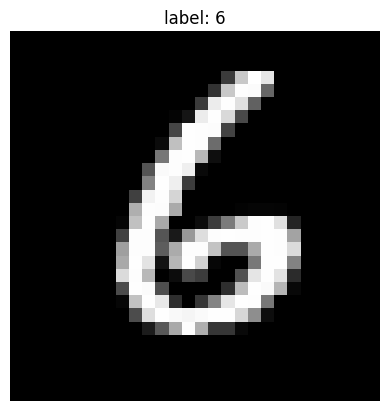

과제2: 네 장 출력


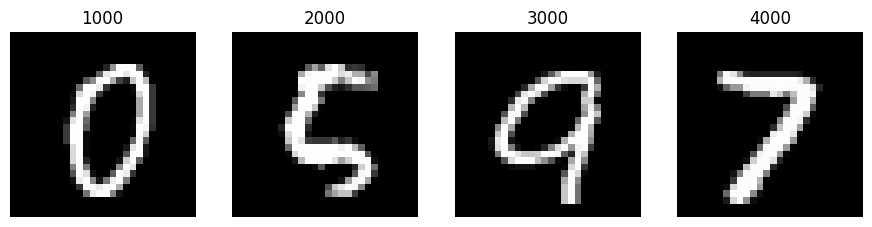

과제3: Dense 128 모델 요약


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

과제4: SGD optimizer 사용
SGD로 컴파일 완료
과제5: epoch 2와 5 비교
학습 시작: epochs = 2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 7s - 4ms/step - accuracy: 0.9229 - loss: 0.2675
Epoch 2/2
1875/1875 - 6s - 3ms/step - accuracy: 0.9647 - loss: 0.1170
학습 시작: epochs = 5
Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9269 - loss: 0.2567
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9659 - loss: 0.1138
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9760 - loss: 0.0767
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9819 - loss: 0.0584
Epoch 5/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9858 - loss: 0.0449
epoch 2 정확도: 0.9682999849319458
epoch 5 정확도: 0.975600004196167
설명: epoch이 많으면 학습량이 증가해서 일반적으로 정확도가 더 높게 나옴


In [2]:
# 작성자: (이름 입력)
# 설명: MNIST 과제 수행 코드 (5개 문제)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# MNIST 불러오기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0


# 과제 1
def image_one(idx=6000):
    # 특정 이미지 하나 보기
    print("과제1: 이미지 하나 출력:", idx)
    plt.imshow(train_x[idx], cmap="gray")
    plt.title("label: {}".format(train_y[idx]))
    plt.axis("off")
    plt.show()


# 과제 2
def image_four(lst=[1000, 2000, 3000, 4000]):
    # 네 장 출력
    print("과제2: 네 장 출력")
    plt.figure(figsize=(11,3))
    for i, n in enumerate(lst):
        plt.subplot(1,4,i+1)
        plt.imshow(train_x[n], cmap="gray")
        plt.title(str(n))
        plt.axis("off")
    plt.show()


# 과제 3
def model_128():
    # 은닉층 128 모델 구성
    print("과제3: Dense 128 모델 요약")
    m = keras.Sequential([
        keras.layers.Input(shape=(28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    m.summary()
    return m


# 과제 4
def use_sgd():
    # SGD로 컴파일하기
    print("과제4: SGD optimizer 사용")
    m = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    m.compile(optimizer=tf.keras.optimizers.SGD(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    print("SGD로 컴파일 완료")
    return m


# 과제 5
def epoch_compare():
    # epochs 2 vs 5 비교
    print("과제5: epoch 2와 5 비교")

    def train(ep):
        temp = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(10, activation="softmax")
        ])
        temp.compile(optimizer="adam",
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])
        print("학습 시작: epochs =", ep)
        temp.fit(train_x, train_y, epochs=ep, verbose=2)
        _, acc = temp.evaluate(test_x, test_y, verbose=0)
        return acc

    a2 = train(2)
    a5 = train(5)

    print("epoch 2 정확도:", a2)
    print("epoch 5 정확도:", a5)
    print("설명: epoch이 많으면 학습량이 증가해서 일반적으로 정확도가 더 높게 나옴")


# 메인 실행
if __name__ == "__main__":
    image_one()
    image_four()
    model_128()
    use_sgd()
    epoch_compare()